
## Jupyter Notebook and data supplemental to the manuscript: "_Up in arms: Immune and nervous system response to sea star wasting disease_"

<!---
INSERT LINKS HERE
--->

---

The code in the IPython notebook will process data such that figures in the manuscript are reproduced (in theory). The intent is to download the github repository locally and run so accompaning scripts and data are available. Detailed Instructions are provided in GitHub Repo Readme. 

---
To execute the Jupyter (IPython) Notebook in its entirety you will need:   

* IPython - [install instructions](http://ipython.org/install.html)    
* NBCI Blast -  [install instructions](http://blast.ncbi.nlm.nih.gov/Blast.cgi?CMD=Web&PAGE_TYPE=BlastDocs&DOC_TYPE=Download)  
* R - [install instructions](http://www.r-project.org/)  
* rpy2 (interface to R from Python) - [install instructions](http://rpy.sourceforge.net/)  
* SQLShare-pythonclient [install instructions](https://github.com/uwescience/sqlshare-pythonclient)


---

**Instructions for use.**   

Identify the location (local) of the blast database you would like to use and indicate path in the cell below. **{db}**

Identify the location of your `sqlshare-pythonclient/tools`  and indicate path in the cell below. **{sqls}**

Change the input to the **{usr}** variable to reflect your SQLShare user account.


In [5]:
#Variables user needs to modify accordingly
db="~/blastdb/uniprot_sprot"

sqls="~/sqlshare-pythonclient/tools/"

usr="sr320@washington.edu"

## Examining _Pycnopodia helianthoides_ coelomocyte _de novo_ transcriptome

In [1]:
#Look at first 2 lines
!head -2 ./data/Phel_transcriptome.fasta

>Phel_contig_1
CAAATATATGAACGGTTGATTGTCAACGATTAGTACATGTTTTCATTGTTCCCCACGCCCGCCCCCCCCCACTCAAACATTTAAAGTGTGAAATATTATTTATCCACAAATTTCCTTAAACCTGCAAACTTGTCTGCTGTCTCTTATTGGAAGTTATGAAAAAGAACAACGGGTTTTCTTTAAAGGGTCTGCGTGCGATTTTCAACCTTTTGAGTAATAGCAGTTATTTTGATAACCGATTTTTTTCAAAGCTCAACAGCTTTTTAAAATAAGGAATCCTATAATGGCCAAACGAATACTATAAAAATAAGGGTTCTCTTAATTGTATAAAACGTATAATTTTATCAATTTTGGGACCGTGTAATTTTTTAAAGACCACAAGAATGTTACATACAACAAATAGACGAAACTCGTAGCTTTGGAAACTACGTCATGGGCGTTTGGTCAAAAGCTGGAGAGAAAGAGAGGTGGGGTGCCAGACTTAAGTAGTCACGTGATCTGACCAACGCACATCGGAAGCTCGATCGGATGAAATCTTCTCTATCGTTCTTGCGTCTATACGTGCTACGAAGAGCTGACAGAAGTTTGGACTTGTTTACTTCTTGCACCTGTTGATGGAACGGCCACGGACCTTGTCGCACGCACACCTGGAGCCAGTGCTCGGATCGACGCAACGGATGTACTGTCTTCCCCTTCCGCGTTTCTCAAGTAGGTACTCAAAGTCGTCCGCGTCGAAGTTGGCCTCGGCGTCCCTCTTCTCCAGCTCCTCCATGTCCTCCTCTGTGTAGTACGGGGTGACGAGCACCACCAGGGCGGCCACAATGGCCAGTGCTAGAAGACACTTCGTATTCATTCTGCTGGTGGTTGGATGTGCGCAAACAAGACAGGAGAGACTTATTAGAATC


In [2]:
#Run perl script cont_fasta.pl - Perl script
#Author: Joseph Fass (modified from script by Brad Sickler) 
#last revised: November 2010 - http://bioinformatics.ucdavis.edu.
#-i can be modified to change bin size
!perl ./scripts/count_fasta.pl -i 1000 ./data/Phel_transcriptome.fasta


0:999 	15505
1000:1999 	8559
2000:2999 	3003
3000:3999 	1240
4000:4999 	580
5000:5999 	312
6000:6999 	129
7000:7999 	72
8000:8999 	31
9000:9999 	19
10000:10999 	9
11000:11999 	7
12000:12999 	2
13000:13999 	4
14000:14999 	3
15000:15999 	0
16000:16999 	1

Total length of sequence:	40747496 bp
Total number of sequences:	29476
N25 stats:			25% of total sequence length is contained in the 2260 sequences >= 3085 bp
N50 stats:			50% of total sequence length is contained in the 6715 sequences >= 1757 bp
N75 stats:			75% of total sequence length is contained in the 14612 sequences >= 959 bp
Total GC count:			16459121 bp
GC %:				40.39 %



## Annotation of transcriptome

In order to annoate the P. hel transcriptome `blastx` was used to compare sequences to the UniProtKB/Swiss_Prot database.    
The specific code is 

```
blastx \
-query Phel_transcriptome.fasta \
-db /your/databaselocation/uniprot_sprot \
-out Phel_uniprot_sprot.tab \
-evalue 1E-05 \
-max_target_seqs 1 \
-max_hsps 1 \
-outfmt 6 \
-num_threads 16
```

This analysis could be run within notebook assuming user has `blast` installed and access to the protein database.

In [ ]:
#Run Blastx against local copy of UniProt/SwissProt Database
!blastx \
-query ./data/Phel_transcriptome.fasta \
-db {db} \
-out ./wd/Phel_uniprot_sprot.tab \
-evalue 1E-05 \
-max_target_seqs 1 \
-max_hsps 1 \
-outfmt 6 \
-num_threads 8

In [8]:
# blastx output
!head -4 ./wd/Phel_uniprot_sprot.tab

Phel_contig_100	sp|Q16513|PKN2_HUMAN	81.33	332	61	1	7935	6940	653	983	5e-162	  537
Phel_contig_1000	sp|Q8R4U2|PDIA1_CRIGR	53.62	442	201	2	199	1512	31	472	5e-146	  464
Phel_contig_10006	sp|Q9Y2H9|MAST1_HUMAN	70.93	289	82	1	861	1	434	722	6e-132	  415
Phel_contig_10021	sp|Q96MU7|YTDC1_HUMAN	60.85	212	82	1	1115	1750	294	504	1e-73	  258


In [9]:
#determining how many sequences have blast hits
!wc -l ./wd/Phel_uniprot_sprot.tab

   10513 ./wd/Phel_uniprot_sprot.tab


## SQLShare will be used to join with additional information

In [10]:
#convert pipes for upload to SQLShare where blast results will be joined with Gene Ontology information
!tr '|' "\t" <./wd/Phel_uniprot_sprot.tab> ./wd/Phel_uniprot_sprot_sql.tab
!head -1 ./wd/Phel_uniprot_sprot.tab
!echo SQLShare ready version has Pipes converted to Tabs ....
!head -1 ./wd/Phel_uniprot_sprot_sql.tab

Phel_contig_100	sp|Q16513|PKN2_HUMAN	81.33	332	61	1	7935	6940	653	983	5e-162	  537
SQLShare ready version has Pipes converted to Tabs ....
Phel_contig_100	sp	Q16513	PKN2_HUMAN	81.33	332	61	1	7935	6940	653	983	5e-162	  537


In [11]:
!python {sqls}singleupload.py \
./wd/Phel_uniprot_sprot_sql.tab
!echo upload timestamp...
!date

processing chunk line 0 to 10513 (0.0074200630188 s elapsed)
pushing ./wd/Phel_uniprot_sprot_sql.tab...
parsing DC465013...
finished Phel_uniprot_sprot_sql.tab
upload timestamp...
Mon Dec 22 15:29:54 PST 2014


### Joining with UniProt information in SQLShare

In [12]:
!python {sqls}fetchdata.py \
-s "SELECT * FROM [{usr}].[Phel_uniprot_sprot_sql.tab]phel left join [sr320@washington.edu].[uniprot-reviewed_wGO_010714]des on phel.Column3=des.Entry" \
-f tsv \
-o ./wd/Phel_uniprot_info.tab


In [13]:
!head -2 ./wd/Phel_uniprot_info.tab

In [14]:
#cleaning up table to only show certain columns

In [15]:
!awk -F\t '{print $1, $3, $24, $13, $26}' ./wd/Phel_uniprot_info.tab | tail -n +2 > ./wd/Phel_uniprot_ID.tab

In [16]:
!head -3 ./wd/Phel_uniprot_ID.tab

Phel_contig_100 Q16513 Serine/threonine-protein kinase N2 (EC 2.7.11.13) (PKN gamma) (Protein kinase C-like 2) (Protein-kinase C-related kinase 2) 5E-162 Homo sapiens (Human)
Phel_contig_1000 Q8R4U2 Protein disulfide-isomerase (PDI) (EC 5.3.4.1) (Prolyl 4-hydroxylase subunit beta) (p58) 5E-146 Cricetulus griseus (Chinese hamster) (Cricetulus barabensis griseus)
Phel_contig_10006 Q9Y2H9 Microtubule-associated serine/threonine-protein kinase 1 (EC 2.7.11.1) (Syntrophin-associated serine/threonine-protein kinase) 6E-132 Homo sapiens (Human)


# Differential Expression Analysis

Count data from CLC...

In [17]:
!head ./data/Phel_countdata.txt

Feature ID	Treated_FHL - Total gene reads	Treated_PH - Total gene reads	Treated_L - Total gene reads	Control_FHL - Total gene reads	Control_DB - Total gene reads	Control_PH - Total gene reads
Phel_contig_1	168	37	8	89	28	38
Phel_contig_10	9518	2752	839	22	42	180
Phel_contig_100	260	565	413	616	1234	6104
Phel_contig_1000	2043	3842	3070	4311	8527	31946
Phel_contig_10000	9	12	13	32	21	211
Phel_contig_10001	44	225	89	90	54	365
Phel_contig_10002	38	61	80	185	478	1267
Phel_contig_10003	9	29	20	17	29	186
Phel_contig_10004	8	25	6	4	19	92


In [18]:
!wc -l ./data/Phel_countdata.txt

   29476 ./data/Phel_countdata.txt


In [19]:
%load_ext rpy2.ipython


In [20]:
%%R 
#source("http://bioconductor.org/biocLite.R")
#biocLite("DESeq2")

NULL


In [21]:
%%R
library(DESeq2)

Loading required package: GenomicRanges
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:stats’:

    xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, intersect,
    is.unsorted, lapply, Map, mapply, match, mget, order, paste, pmax,
    pmax.int, pmin, pmin.int, Position, rank, rbind, Reduce, rep.int,
    rownames, sapply, setdiff, sort, table, tapply, union, unique,
    unlist

Loading required package: IRanges
Loading required package: GenomeInfoDb
Loading required package: Rcpp
Loading required package: RcppArm

In [22]:
%%R
data <- read.table("./data/Phel_countdata.txt", header = T, sep = "\t")
rownames(data) <- data$Feature
data <- data[,-1]

In [23]:
%%R
# Build Objects
# Specify which columns are in which groups
deseq2.colData <- data.frame(condition=factor(c(rep("Treated", 3), rep("Control", 3))), 
                             type=factor(rep("single-read", 6)))
rownames(deseq2.colData) <- colnames(data)
deseq2.dds <- DESeqDataSetFromMatrix(countData = data,
                                     colData = deseq2.colData, 
                                     design = ~ condition)

In [24]:
%%R
# Run Analysis
deseq2.dds <- DESeq(deseq2.dds)
deseq2.res <- results(deseq2.dds)
deseq2.res <- deseq2.res[order(rownames(deseq2.res)), ]

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [25]:
%%R
head(deseq2.res)

log2 fold change (MAP): condition Treated vs Control 
Wald test p-value: condition Treated vs Control 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE        stat       pvalue
                   <numeric>      <numeric> <numeric>   <numeric>    <numeric>
Phel_contig_1      114.07829     1.62009683 0.9832754  1.64765323 9.942385e-02
Phel_contig_10    5492.70960     7.62981964 0.7912097  9.64323332 5.250751e-22
Phel_contig_100    786.08744     0.01618812 0.3188107  0.05077657 9.595036e-01
Phel_contig_1000  5406.89996     0.21136426 0.3459447  0.61097705 5.412148e-01
Phel_contig_10000   24.76992    -0.20013559 0.6269094 -0.31924166 7.495433e-01
Phel_contig_10001  136.22441     1.60180411 0.5966195  2.68480001 7.257322e-03
                          padj
                     <numeric>
Phel_contig_1     2.778325e-01
Phel_contig_10    2.773165e-19
Phel_contig_100   9.834211e-01
Phel_contig_1000  7.554609e-01
Phel_contig_10000 8.842128e-01
Phel_contig_

In [26]:
%%R
# Count number of hits with adjusted p-value less then 0.05
dim(deseq2.res[!is.na(deseq2.res$padj) & deseq2.res$padj <= 0.05, ])

[1] 3773    6


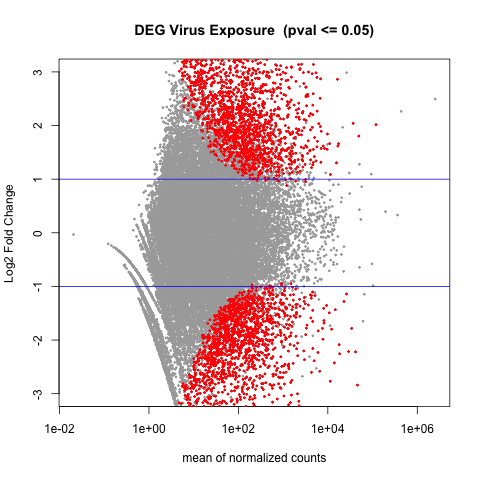

In [27]:
%%R
tmp <- deseq2.res
# The main plot
plot(tmp$baseMean, tmp$log2FoldChange, pch=20, cex=0.45, ylim=c(-3, 3), log="x", col="darkgray",
     main="DEG Virus Exposure  (pval <= 0.05)",
     xlab="mean of normalized counts",
     ylab="Log2 Fold Change")
# Getting the significant points and plotting them again so they're a different color
tmp.sig <- deseq2.res[!is.na(deseq2.res$padj) & deseq2.res$padj <= 0.05, ]
points(tmp.sig$baseMean, tmp.sig$log2FoldChange, pch=20, cex=0.45, col="red")
# 2 FC lines
abline(h=c(-1,1), col="blue")

In [28]:
%%R
write.table(tmp.sig, "./wd/Phel_DEGlist.tab", row.names = T)

In [29]:
!head ./wd/Phel_DEGlist.tab

"baseMean" "log2FoldChange" "lfcSE" "stat" "pvalue" "padj"
"Phel_contig_10" 5492.70960072414 7.62981963801218 0.791209689281713 9.64323331901912 5.250750567205e-22 2.77316470200627e-19
"Phel_contig_10001" 136.224412089297 1.6018041057117 0.596619525301856 2.68480000700827 0.00725732180374353 0.0435439308224612
"Phel_contig_10005" 51.5511935035151 -2.6900828854296 0.967063782856695 -2.78170161380993 0.00540747316717733 0.0349741409683566
"Phel_contig_10010" 8.7342056518699 2.79633731397416 0.8776643866179 3.18611231879866 0.00144198603335619 0.0126467256242587
"Phel_contig_10013" 189.785994443343 -2.05500342602883 0.505265919047074 -4.06717205447885 4.75871086619138e-05 0.000815875891500461
"Phel_contig_10045" 50.2388038133868 3.34055697406 0.788340247567732 4.23745582490127 2.26066880151196e-05 0.000436296989553832
"Phel_contig_1005" 3425.16142786886 -1.72144787339153 0.420615456798411 -4.09268809685368 4.26401104553472e-05 0.000745221107183283
"Phel_contig_10050" 281.308679616738 -1.5